In [68]:
from sklearn import datasets, model_selection, linear_model, neural_network, preprocessing, model_selection

import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob, os


[[ 0  0  0 ...  0 17  3]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 10  0 10]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


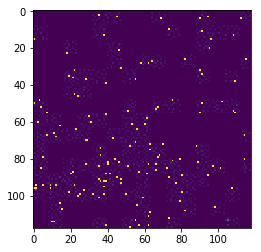

In [84]:
# First we load the data
#print((mnist.images[0]))
#mnist = datasets.load_digits()
#X,y = mnist.images,mnist.target
#X = X.reshape(len(X),-1)

images=[]
X=[]
y=[]

for file in glob.glob("tiles/*.jpg"):
    #print(file.split("_"))
    #z = cv2.imread(file, cv2.IMREAD_GRAYSCALE),file.split("_")[1]
    #images.append(z) #file, tile number, rotation
    X.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE)) #file, tile number, rotation
    y.append(file.split("_")[1])

#print(images[1][0][0])
#print(images[0])
plt.imshow(X[0])

#X = images[0][:]
#y= images[1][:]

#X = X.reshape(len(X),-1)

print(X[0])


This tile is '29'


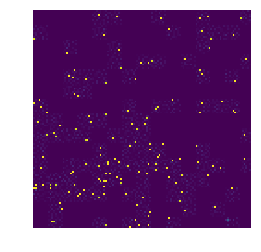

This tile is '61'


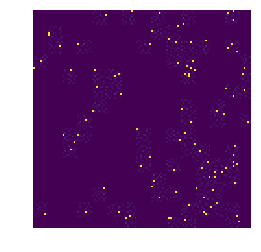

This tile is '142'


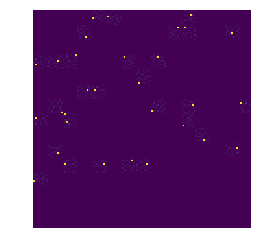

This tile is '86'


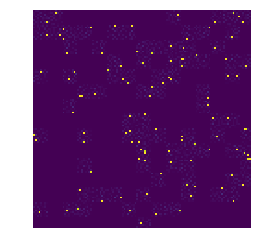

This tile is '61'


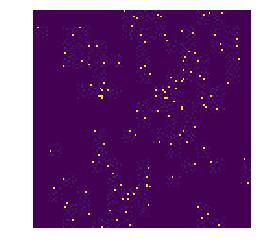

This tile is '132'


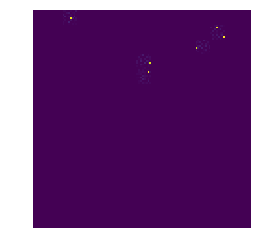

This tile is '121'


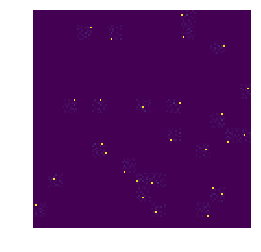

This tile is '28'


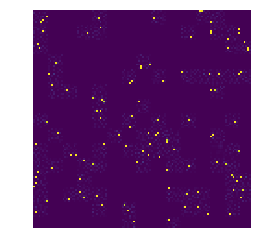

This tile is '63'


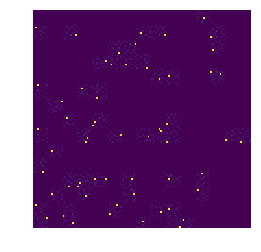

This tile is '11'


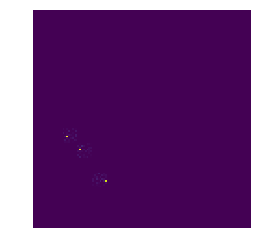

In [70]:
# Let's see what the data looks like
for idx in range(10):
    #print(idx)
    print("This tile is "+repr(y[idx]))
    plt.imshow(X[idx])
    plt.axis('off')
    plt.show()

In [81]:
scalar = preprocessing.MinMaxScaler()
scalar.fit(X)
X_normalized=scalar.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size=0.33, random_state=42)


ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

predictions = clf.predict(X_test)

perc=0

for i in range(len(predictions)):
    if y_test[i]==predictions[i]:
        perc+=1

print("Test scored: "+repr(perc/float(len(predictions))))

Test scored: 0.968013468013468
